In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
x=np.linspace(0,2*np.pi,1000)
y1 = np.sin(x + np.deg2rad(60)) + np.random.normal(scale=0.1, size=x.shape)
y2 = np.sin(x + np.deg2rad(300)) + np.random.normal(scale=0.1, size=x.shape)

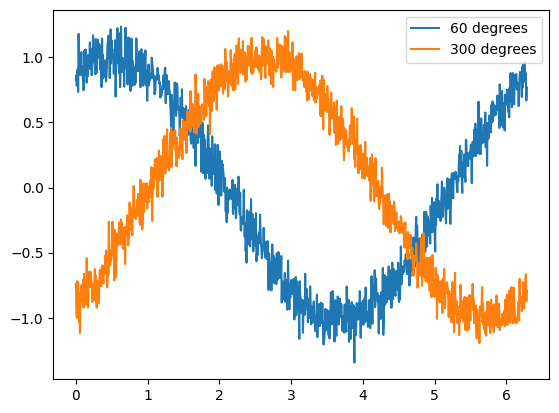

In [ ]:
plt.plot(x, y1, label='60 degrees')
plt.plot(x, y2, label='300 degrees')
plt.legend()
plt.show()

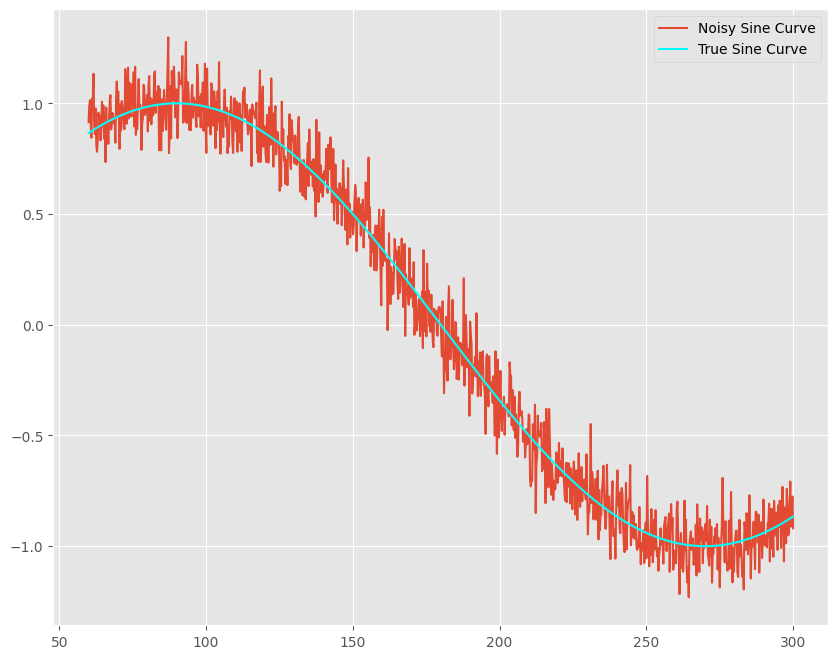

In [ ]:
x = np.linspace(60, 300, 1000)
y_true = np.sin(np.radians(x))
noise = np.random.normal(0, 0.1, len(x))
y = y_true + noise

plt.plot(x, y, label='Noisy Sine Curve')
plt.plot(x, y_true, color='cyan', label='True Sine Curve')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,8)

In [ ]:
df = pd.read_csv('/content/food_truck_data (1).txt')

In [ ]:
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


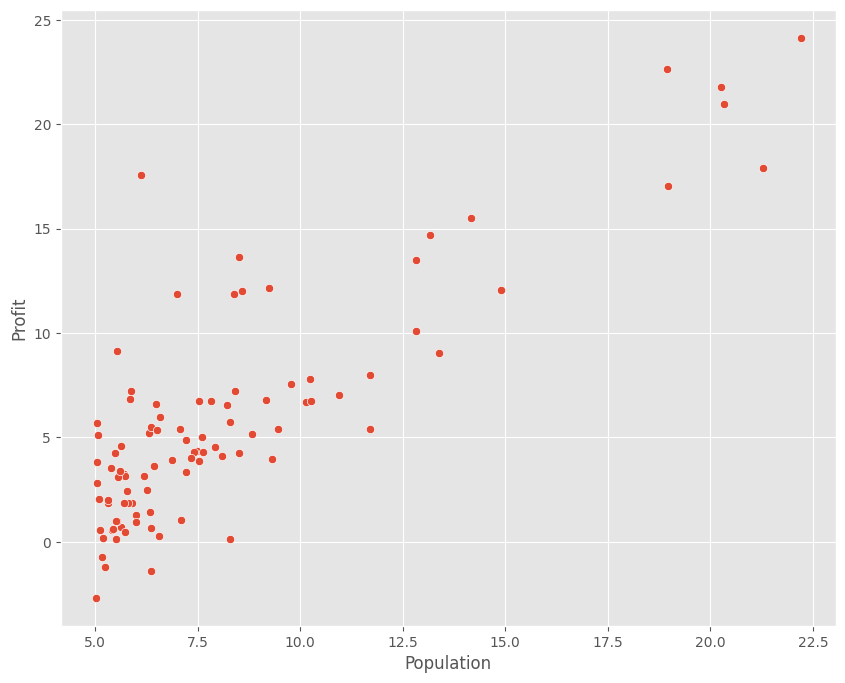

In [ ]:
ax = sns.scatterplot(x='Population', y='Profit', data=df)


In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    h = np.dot(X, theta)
    error = h - y
    cost = np.sum(error**2) / (2 * m)
    return cost

In [ ]:
m = df["Population"].size
X = np.append(np.ones((m,1)),df['Population'].values.reshape(m,1), axis=1)
y = df['Profit'].values.reshape(m,1)
theta = np.zeros((2, 1))

compute_cost(X,y,theta)

32.072733877455676

In [ ]:
def grad_desc(X, y, theta, alpha, iterations):
  m = len(y)
  cost = []
  for i in range(iterations):
    y_preds = np.dot(X, theta)
    error = np.dot(X.transpose(), (y_preds - y))
    theta -= alpha * 1/m * error
    cost.append(compute_cost(X,y,theta))
  return theta, cost

In [ ]:
theta , cost = grad_desc(X, y, theta, alpha=0.01, iterations=10)
print(f'h(x) = {format(str(round(theta[0,0],2)))} + {str(round(theta[1,0],2))}x1')

h(x) = 0.01 + 0.8x1


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
theta_0 = np.linspace (-10, 10, 100)
theta_1 = np.linspace(-1, 4, 100)

cost_values = np.zeros((len(theta_0), len(theta_1)))

for i in range(len(theta_0)):
  for j in range(len(theta_1)):
    t = np.array([theta_0[i], theta_1[j]])

    cost_values[i, j] = compute_cost (X,y,t)

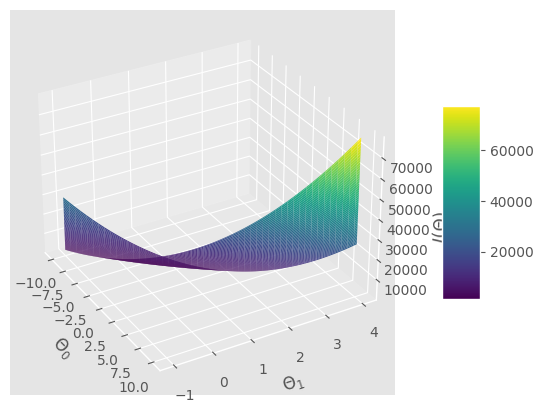

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface (theta_0, theta_1, cost_values, cmap="viridis")
fig.colorbar (surf, shrink=0.5, aspect=5)

plt.xlabel("$\\Theta_0$")
plt.ylabel("$\\Theta_1$")
ax.set_zlabel("$J(\\Theta)$")

ax.view_init(30, 330)
plt.show()

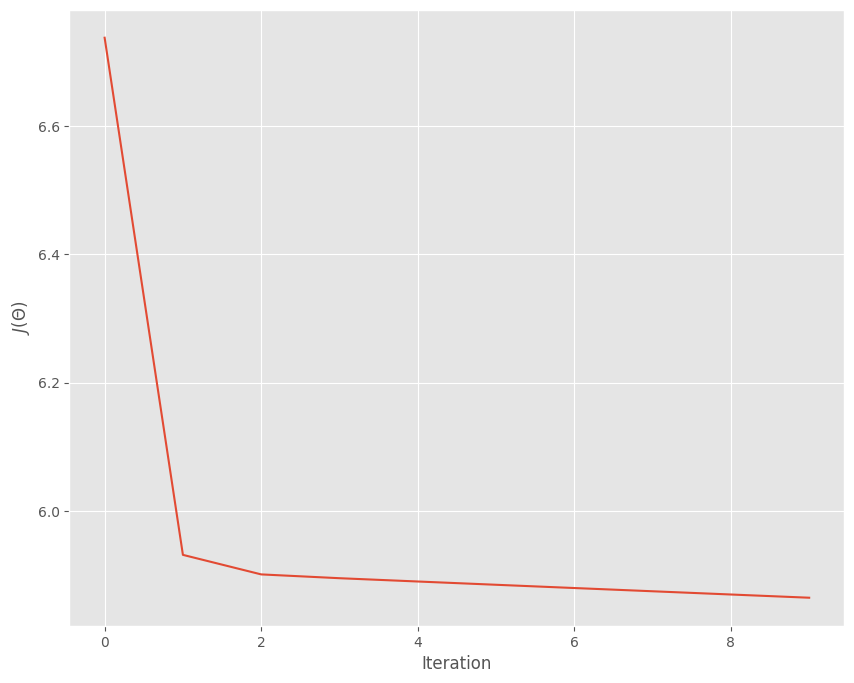

In [ ]:
plt.plot(cost)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.show()

In [ ]:
def predict(X,theta):
  y_pred= np.dot(X, theta)
  return y_pred

In [ ]:
y_preds = predict(X, theta)

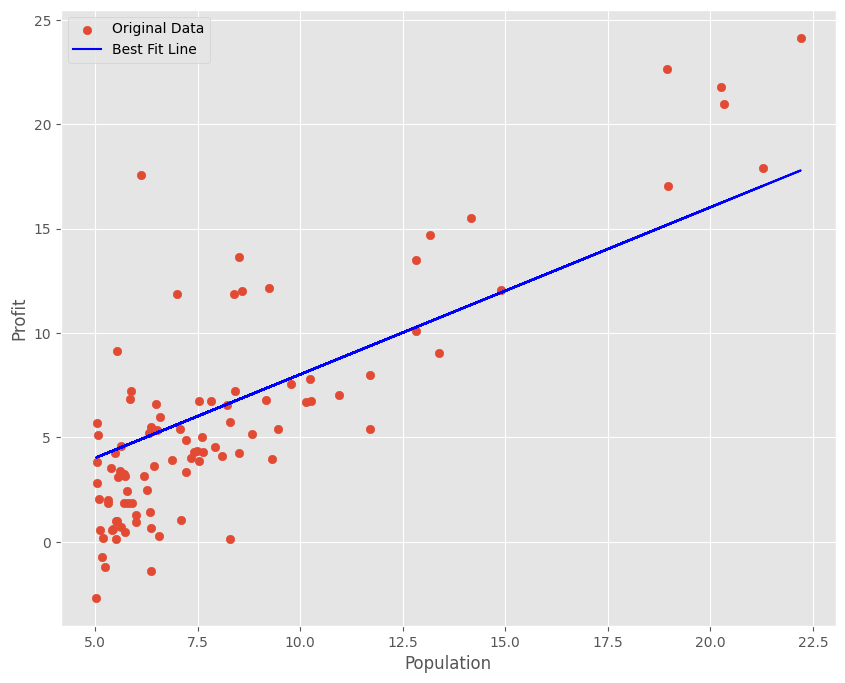

In [ ]:
plt.scatter(df['Population'], y, label='Original Data')
plt.plot(df['Population'], y_preds, color='blue', label='Best Fit Line')

plt.xlabel('Population')
plt.ylabel('Profit')
plt.legend()
plt.show()

Mean squared error: 8.953942751950358


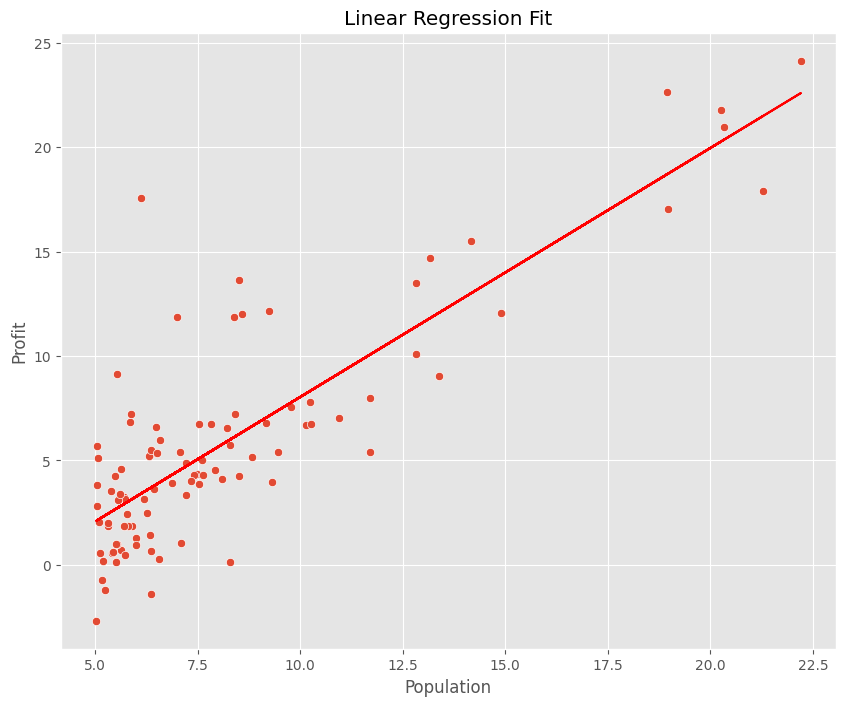

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(df[['Population']], df['Profit'])
y_pred = model.predict(df[['Population']])

mse = 1/(len(df['Profit'])) * np.sum((y_pred - df['Profit'])**2)
print("Mean squared error:", mse)

sns.scatterplot(x="Population", y="Profit", data = df)
plt.plot(df['Population'] , y_pred, color='red')
plt.title("Linear Regression Fit")
plt.show()

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/home_data (1).csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
cols = ['bedrooms','bathrooms','sqft_living']
df_reduced = data[cols]
df_reduced.head()

,bedrooms,bathrooms,sqft_living
0,3,1.00,1180
1,3,2.25,2570
2,2,1.00,770
3,4,3.00,1960
4,3,2.00,1680


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_reduced, data['price'], test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [ ]:
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print(f'training data score: {reg.score(X_train, y_train)}')
print(f'testing data score: {reg.score(X_test, y_test)}')

training data score: 0.5111175208202305
testing data score: 0.4978201421834113


In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 50,max_iter = 100,tol = 0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
print(f'training data score: {lasso_reg.score(X_train, y_train)}')
print(f'testing data score: {lasso_reg.score(X_test, y_test)}')

training data score: 0.5111174542409918
testing data score: 0.49781742392500006


In [ ]:
ridge_reg = linear_model.Ridge(alpha = 50,max_iter = 100,tol = 0.1)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
print(f'training data score: {ridge_reg.score(X_train, y_train)}')
print(f'testing data score: {ridge_reg.score(X_test, y_test)}')

training data score: 0.5111169913547382
testing data score: 0.49781207108257
